# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [11]:
# Install Hugging Face datasets if not already available
!pip install -q datasets

# Load the TweetEval sentiment dataset
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("tweet_eval", "sentiment")

# Convert to pandas DataFrame
df = pd.DataFrame(dataset["train"])

# Map numerical labels to text
label_map = {0: "negative", 1: "neutral", 2: "positive"}
df["label"] = df["label"].map(label_map)

# Display the first few rows
df.head()


,text,label
0,"""QT @user In the original draft of the 7th boo...",positive
1,"""Ben Smith / Smith (concussion) remains out of...",neutral
2,Sorry bout the stream last night I crashed out...,neutral
3,Chase Headley's RBI double in the 8th inning o...,neutral
4,@user Alciato: Bee will invest 150 million in ...,positive


Class Distribution:

label
neutral     20673
positive    17849
negative     7093
Name: count, dtype: int64


<ipython-input-12-daf6a631238b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


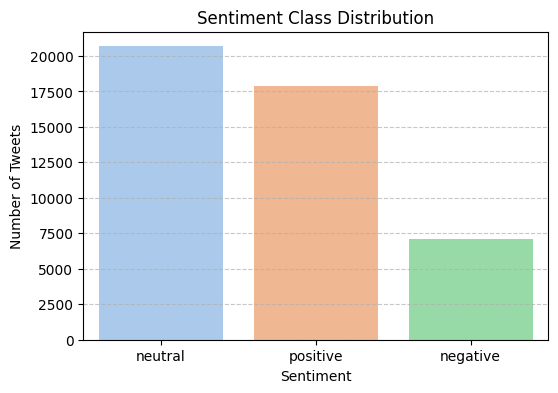

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples per class
class_counts = df["label"].value_counts()

# Display class distribution
print("Class Distribution:\n")
print(class_counts)

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.title("Sentiment Class Distribution")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [13]:
# Install NLTK and spaCy
!pip install -q nltk spacy
!python -m spacy download en_core_web_sm

import re
import nltk
import spacy
from nltk.corpus import stopwords
from tqdm.notebook import tqdm

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Text cleaning function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#\w+", '', text)
    # Remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", '', text)

    # Tokenize and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_space]

    return " ".join(tokens)

# Apply preprocessing to a sample (use full data later to save time now)
df["clean_text"] = df["text"].apply(preprocess_text)
df[["text", "clean_text", "label"]].head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text,label
0,"""QT @user In the original draft of the 7th boo...",qt original draft th book remus lupin survive ...,positive
1,"""Ben Smith / Smith (concussion) remains out of...",ben smith smith concussion remain lineup thurs...,neutral
2,Sorry bout the stream last night I crashed out...,sorry bout stream last night crash tonight sur...,neutral
3,Chase Headley's RBI double in the 8th inning o...,chase headley rbi double th inning david price...,neutral
4,@user Alciato: Bee will invest 150 million in ...,alciato bee invest million january another sum...,positive


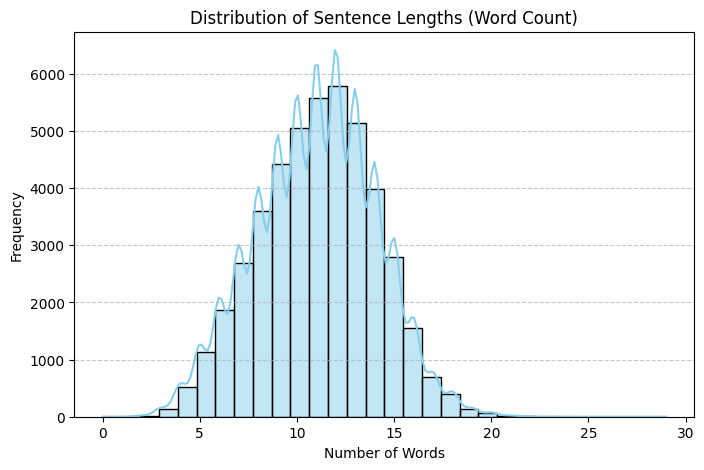

In [14]:
# Add sentence length column (word count)
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

# Plot histogram of sentence lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sentence Lengths (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [15]:
!pip install -q wordcloud
from wordcloud import WordCloud


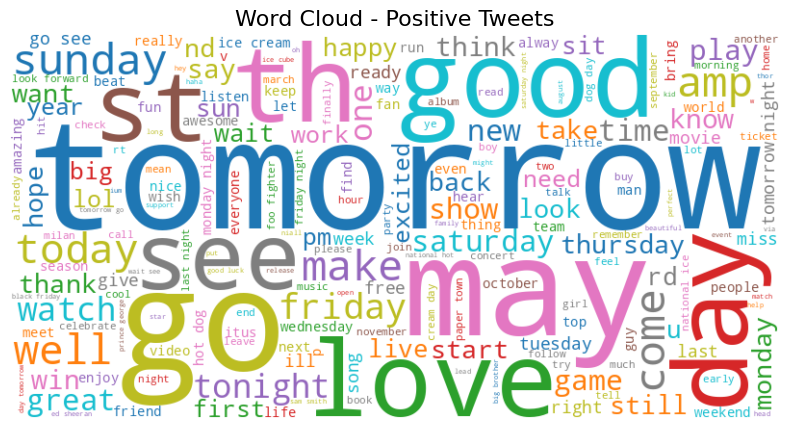

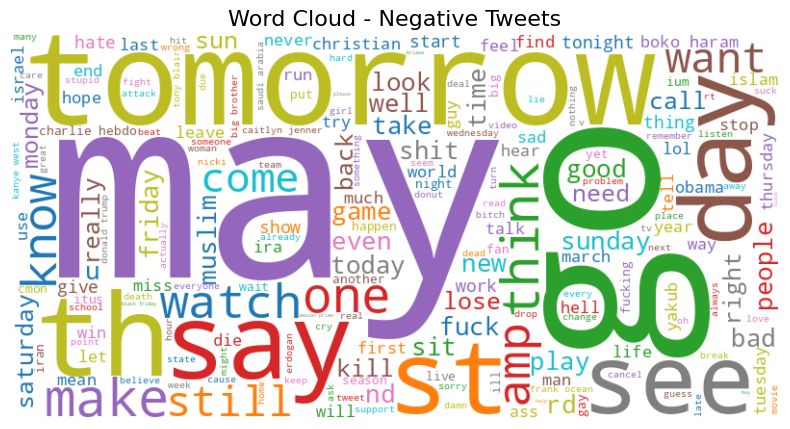

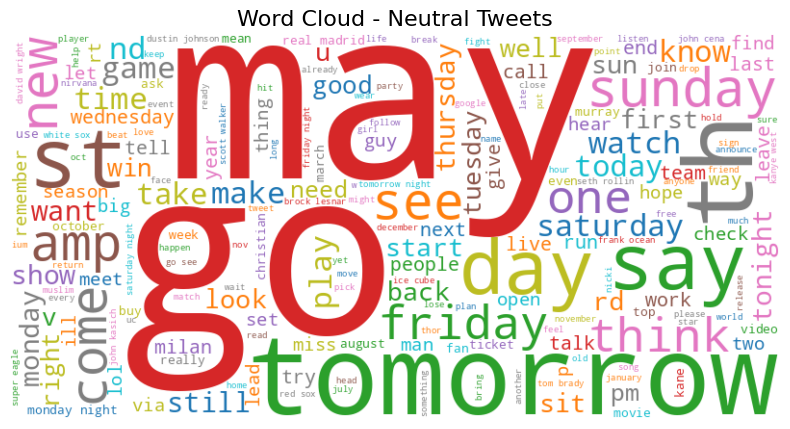

In [16]:
import matplotlib.pyplot as plt

# Function to generate word cloud for each sentiment
def generate_wordcloud(label):
    text = " ".join(df[df["label"] == label]["clean_text"])
    wc = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {label.capitalize()} Tweets", fontsize=16)
    plt.show()

# Generate word clouds for all three classes
for sentiment in ["positive", "negative", "neutral"]:
    generate_wordcloud(sentiment)


<ipython-input-17-0963ea15b6b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette="viridis")


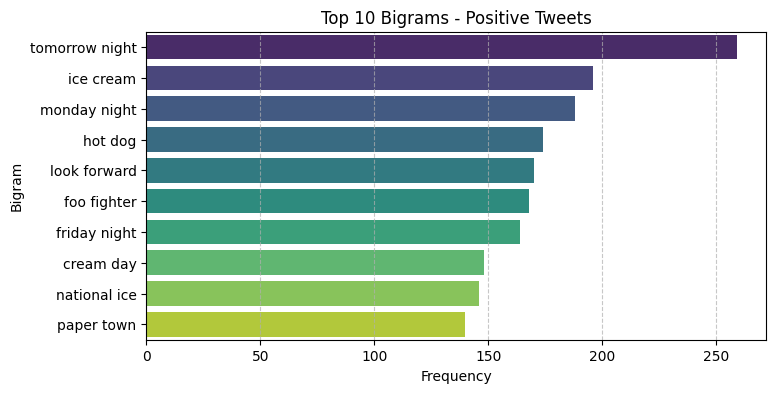

<ipython-input-17-0963ea15b6b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette="viridis")


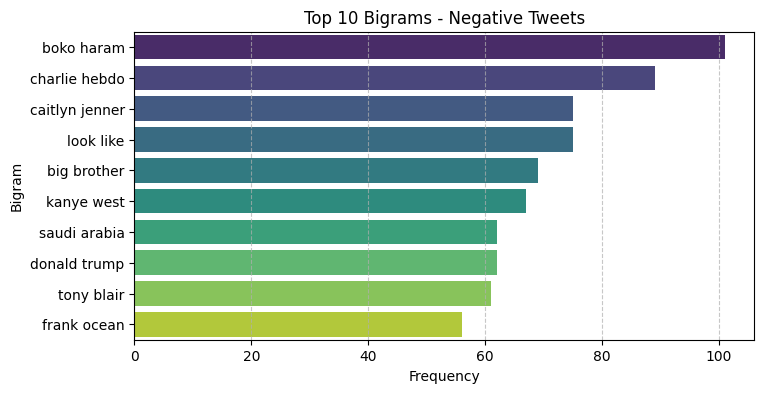

<ipython-input-17-0963ea15b6b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette="viridis")


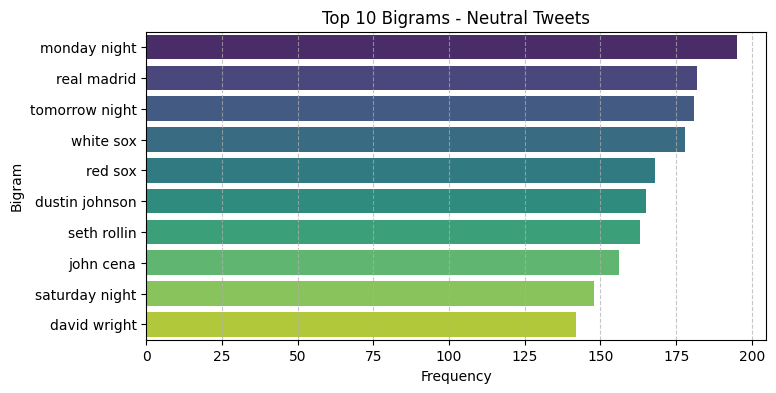

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Function to get top N bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Plot top bigrams for each sentiment
def plot_top_bigrams(sentiment, top_n=10):
    corpus = df[df["label"] == sentiment]["clean_text"]
    top_ngrams = get_top_ngrams(corpus, n=top_n)
    labels, counts = zip(*top_ngrams)

    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(labels), palette="viridis")
    plt.title(f"Top {top_n} Bigrams - {sentiment.capitalize()} Tweets")
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

# Run for each sentiment
for sentiment in ["positive", "negative", "neutral"]:
    plot_top_bigrams(sentiment)


In [18]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

# Check split sizes
print(f"Training size: {len(X_train)}")
print(f"Testing size: {len(X_test)}")


Training size: 36492
Testing size: 9123


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Unigrams + bigrams

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF train shape: {X_train_tfidf.shape}")
print(f"TF-IDF test shape: {X_test_tfidf.shape}")


TF-IDF train shape: (36492, 5000)
TF-IDF test shape: (9123, 5000)


In [22]:
# Install XGBoost if not already installed
!pip install -q xgboost

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize models
svm_model = SVC(kernel='linear', random_state=42)
nb_model = MultinomialNB()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train and evaluate models using cross-validation
models = [svm_model, nb_model, xgb_model]
model_names = ["SVM", "Naive Bayes", "XGBoost"]

# Create and fit a LabelEncoder before the loop
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

for model, name in zip(models, model_names):
    print(f"Training and Evaluating {name}...")

    # Use encoded labels for XGBoost
    if name == "XGBoost":
        scores = cross_val_score(model, X_train_tfidf, y_train_encoded, cv=5, scoring='accuracy')
        model.fit(X_train_tfidf, y_train_encoded)
        y_pred = model.predict(X_test_tfidf)

        # Use encoded labels for evaluation
        print(f"Classification Report for {name}:\n")
        print(classification_report(y_test_encoded, y_pred))
        print(f"Confusion Matrix for {name}:\n")
        print(confusion_matrix(y_test_encoded, y_pred))
    else:
        # For other models, use original labels
        scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)

        # Use original labels for evaluation
        print(f"Classification Report for {name}:\n")
        print(classification_report(y_test, y_pred))
        print(f"Confusion Matrix for {name}:\n")
        print(confusion_matrix(y_test, y_pred))

    print(f"Cross-validation accuracy for {name}: {scores.mean():.4f} ± {scores.std():.4f}")
    print("\n" + "="*50 + "\n")

Training and Evaluating SVM...
Classification Report for SVM:

              precision    recall  f1-score   support

    negative       0.60      0.38      0.46      1379
     neutral       0.61      0.77      0.68      4112
    positive       0.73      0.61      0.67      3632

    accuracy                           0.65      9123
   macro avg       0.64      0.59      0.60      9123
weighted avg       0.66      0.65      0.64      9123

Confusion Matrix for SVM:

[[ 518  702  159]
 [ 254 3173  685]
 [  96 1305 2231]]
Cross-validation accuracy for SVM: 0.6510 ± 0.0038


Training and Evaluating Naive Bayes...
Classification Report for Naive Bayes:

              precision    recall  f1-score   support

    negative       0.60      0.21      0.32      1379
     neutral       0.59      0.74      0.66      4112
    positive       0.66      0.64      0.65      3632

    accuracy                           0.62      9123
   macro avg       0.62      0.53      0.54      9123
weighted avg    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:58:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:59:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.60      0.25      0.35      1379
           1       0.58      0.85      0.69      4112
           2       0.76      0.53      0.62      3632

    accuracy                           0.63      9123
   macro avg       0.65      0.54      0.55      9123
weighted avg       0.66      0.63      0.61      9123

Confusion Matrix for XGBoost:

[[ 342  890  147]
 [ 167 3489  456]
 [  57 1654 1921]]
Cross-validation accuracy for XGBoost: 0.6341 ± 0.0045




In [23]:
!pip install -q transformers datasets


In [24]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder

# Encode labels as numbers (0 = negative, 1 = neutral, 2 = positive)
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom dataset class
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Create datasets
train_dataset = TweetDataset(X_train, y_train_enc, tokenizer)
test_dataset = TweetDataset(X_test, y_test_enc, tokenizer)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [26]:
from torch.optim import AdamW  # <-- FIXED import
from transformers import get_scheduler
from tqdm import tqdm


In [28]:
# Change this line
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# To this (renaming to avoid clash)
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
import torch

# Choose GPU if available, else fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [36]:
bert_model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [37]:
import torch
from torch.optim import AdamW
from transformers import get_scheduler, BertTokenizer, BertForSequenceClassification
from tqdm.auto import tqdm

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BERT model for 3-class classification
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
bert_model.to(device)

# Optimizer
optimizer = AdamW(bert_model.parameters(), lr=2e-5)

# Scheduler
num_epochs = 2
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_loader) * num_epochs,
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
# ⚡ Use only 1000 samples for fast training
X_train_subset = X_train[:1000]
y_train_subset = y_train_enc[:1000]


In [40]:
# Recreate the dataset and loader
train_dataset = TweetDataset(X_train_subset, y_train_subset, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [41]:
quick_epochs = 1
bert_model.train()

for epoch in range(quick_epochs):
    print(f"\n⚡ Epoch {epoch + 1}/{quick_epochs}")
    loop = tqdm(train_loader, leave=True)

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())



⚡ Epoch 1/1


  0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


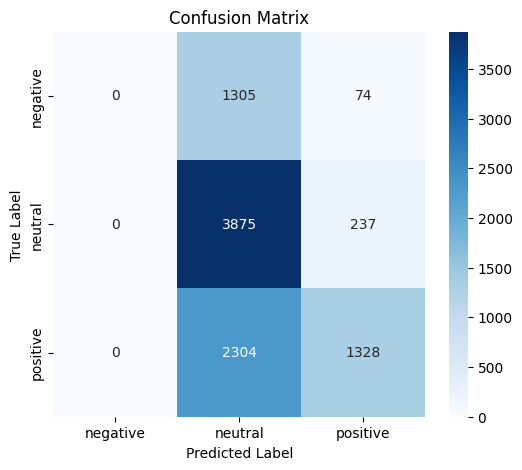

Accuracy: 0.5703
Precision: 0.5559
Recall: 0.5703
F1 Score: 0.5018


In [43]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set BERT model to evaluation mode
bert_model.eval()

# Initialize lists to collect predictions and true labels
predictions, true_labels = [], []

# Run predictions on the test set
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = bert_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get predictions (index of highest logit)
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Output metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
#2.1
import pandas as pd
import re
import spacy
from tqdm import tqdm

# Load files
train_path = 'stsa-train.txt'
test_path = 'stsa-test.txt'

def load_stsa_file(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            label = int(line[0])
            text = line[2:].strip()
            data.append((text, label))
    return pd.DataFrame(data, columns=['text', 'label'])

df_train = load_stsa_file(train_path)
df_test = load_stsa_file(test_path)

# Load spaCy model
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in nlp.Defaults.stop_words and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing
tqdm.pandas()
df_train['clean_text'] = df_train['text'].progress_apply(preprocess)
df_test['clean_text'] = df_test['text'].progress_apply(preprocess)

# Show samples
df_train[['text', 'clean_text']].head()


100%|██████████| 1821/1821 [00:08<00:00, 225.47it/s]


,text,clean_text
0,"a stirring , funny and finally transporting re...",stirring funny finally transport reimagine bea...
1,apparently reassembled from the cutting-room f...,apparently reassemble cuttingroom floor daytim...
2,they presume their audience wo n't sit still f...,presume audience sit sociology lesson entertai...
3,this is a visually stunning rumination on love...,visually stunning rumination love memory histo...
4,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby beallendall moderno...


<ipython-input-2-0d5007995217>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='label', ax=axes[0], palette='Set2')
<ipython-input-2-0d5007995217>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test, x='label', ax=axes[1], palette='Set2')


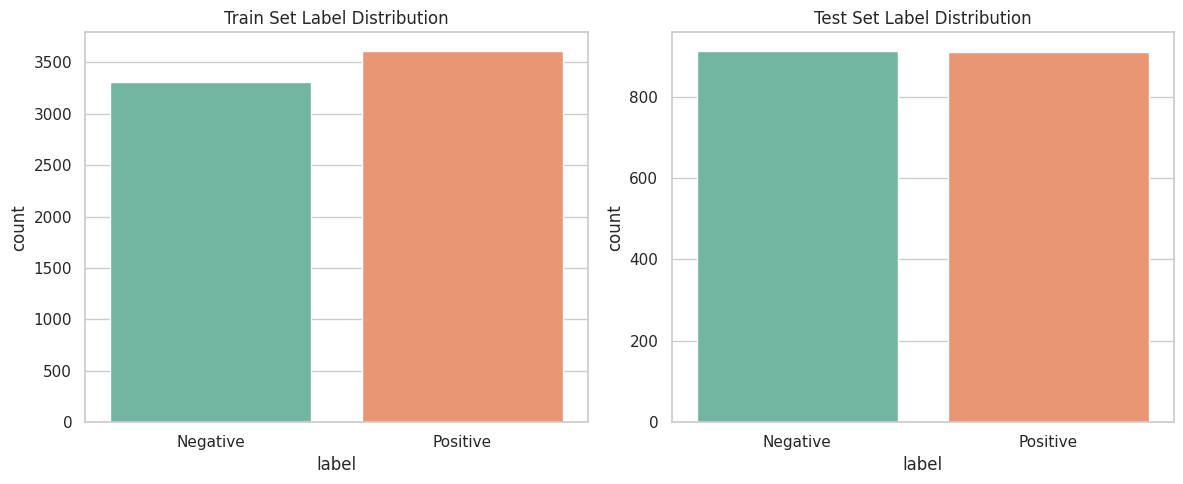

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_train, x='label', ax=axes[0], palette='Set2')
axes[0].set_title('Train Set Label Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Negative', 'Positive'])

sns.countplot(data=df_test, x='label', ax=axes[1], palette='Set2')
axes[1].set_title('Test Set Label Distribution')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the original training set (80% train, 20% validation)
X_all = df_train['clean_text']
y_all = df_train['label']
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)

# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)


In [ ]:
#2.2 , 2.3
# Set up cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
svm = LinearSVC()

# Cross-validated accuracy
cv_accuracy = cross_val_score(svm, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print("SVM 10-Fold Accuracy Scores:", cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())


SVM 10-Fold Accuracy Scores: [0.7599278  0.78519856 0.75812274 0.7400722  0.75631769 0.75451264
 0.75587703 0.76130199 0.75768535 0.7323689 ]
Mean Accuracy: 0.7561384897604795


In [ ]:
# Train and evaluate on hold-out validation set
svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_val_tfidf)

print("\n📊 Final SVM Evaluation on Validation Set:")
print("Accuracy :", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall   :", recall_score(y_val, y_pred))
print("F1 Score :", f1_score(y_val, y_pred))



📊 Final SVM Evaluation on Validation Set:
Accuracy : 0.7492774566473989
Precision: 0.7450980392156863
Recall   : 0.7894736842105263
F1 Score : 0.7666442501681238


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Cross-validated accuracy
cv_accuracy_knn = cross_val_score(knn, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print("KNN 10-Fold Accuracy Scores:", cv_accuracy_knn)
print("Mean Accuracy:", cv_accuracy_knn.mean())


KNN 10-Fold Accuracy Scores: [0.51083032 0.53068592 0.48736462 0.50541516 0.50361011 0.49097473
 0.48824593 0.50994575 0.50090416 0.48462929]
Mean Accuracy: 0.5012606002049862


In [ ]:
# Train on training set
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_val_tfidf)

print("\n📊 Final KNN Evaluation on Validation Set:")
print("Accuracy :", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn))
print("Recall   :", recall_score(y_val, y_pred_knn))
print("F1 Score :", f1_score(y_val, y_pred_knn))



📊 Final KNN Evaluation on Validation Set:
Accuracy : 0.513728323699422
Precision: 0.5337931034482759
Recall   : 0.53601108033241
F1 Score : 0.5348997926744989


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Cross-validated accuracy
cv_accuracy_dt = cross_val_score(dt, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print("Decision Tree 10-Fold Accuracy Scores:", cv_accuracy_dt)
print("Mean Accuracy:", cv_accuracy_dt.mean())


Decision Tree 10-Fold Accuracy Scores: [0.60108303 0.66606498 0.61191336 0.63718412 0.62815884 0.62454874
 0.62206148 0.62567812 0.66546112 0.62567812]
Mean Accuracy: 0.6307831911268369


In [ ]:
# Train on training set
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_val_tfidf)

print("\n📊 Final Decision Tree Evaluation on Validation Set:")
print("Accuracy :", accuracy_score(y_val, y_pred_dt))
print("Precision:", precision_score(y_val, y_pred_dt))
print("Recall   :", recall_score(y_val, y_pred_dt))
print("F1 Score :", f1_score(y_val, y_pred_dt))


📊 Final Decision Tree Evaluation on Validation Set:
Accuracy : 0.6358381502890174
Precision: 0.6602941176470588
Recall   : 0.6218836565096952
F1 Score : 0.6405135520684736


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validated accuracy
cv_accuracy_rf = cross_val_score(rf, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print("Random Forest 10-Fold Accuracy Scores:", cv_accuracy_rf)
print("Mean Accuracy:", cv_accuracy_rf.mean())


Random Forest 10-Fold Accuracy Scores: [0.74187726 0.75451264 0.69494585 0.70758123 0.70577617 0.71119134
 0.71428571 0.72151899 0.71790235 0.71790235]
Mean Accuracy: 0.7187493879789268


In [ ]:
# Train on training set
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_val_tfidf)

print("\n📊 Final Random Forest Evaluation on Validation Set:")
print("Accuracy :", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall   :", recall_score(y_val, y_pred_rf))
print("F1 Score :", f1_score(y_val, y_pred_rf))



📊 Final Random Forest Evaluation on Validation Set:
Accuracy : 0.7001445086705202
Precision: 0.703851261620186
Recall   : 0.7340720221606648
F1 Score : 0.7186440677966102


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validated accuracy
cv_accuracy_xgb = cross_val_score(xgb, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print("XGBoost 10-Fold Accuracy Scores:", cv_accuracy_xgb)
print("Mean Accuracy:", cv_accuracy_xgb.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost 10-Fold Accuracy Scores: [0.6967509  0.72382671 0.68050542 0.72202166 0.66245487 0.65884477
 0.68716094 0.6835443  0.69077758 0.70524412]
Mean Accuracy: 0.6911131276072098


In [ ]:
# Train on training set
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_val_tfidf)

print("\n📊 Final XGBoost Evaluation on Validation Set:")
print("Accuracy :", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall   :", recall_score(y_val, y_pred_xgb))
print("F1 Score :", f1_score(y_val, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:14:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Final XGBoost Evaluation on Validation Set:
Accuracy : 0.6748554913294798
Precision: 0.7011834319526628
Recall   : 0.6565096952908587
F1 Score : 0.6781115879828327


In [ ]:
!pip uninstall -y numpy
!pip uninstall -y gensim
!pip uninstall -y scipy
!pip install numpy==1.24.3
!pip install gensim scipy

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.47.1 requires scipy, which is not installed.
hyperopt 0.2.7 requires scipy, which is not installed.
cuml-cu12 25.2.1 requires scipy>=1.8.0, which is not installed.
pymc 5.21.2 requires scipy>=1.4.1, which is not installed.
plotnine 0.14.5 requires scipy>=1.8.0, which is not installed.
cvxpy

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 w

In [ ]:
import pandas as pd
import re
import spacy
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Load files
train_path = 'stsa-train.txt'
test_path = 'stsa-test.txt'

def load_stsa_file(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            label = int(line[0])
            text = line[2:].strip()
            data.append((text, label))
    return pd.DataFrame(data, columns=['text', 'label'])

df_train = load_stsa_file(train_path)
df_test = load_stsa_file(test_path)

# Load spaCy model
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in nlp.Defaults.stop_words and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing
tqdm.pandas()
df_train['clean_text'] = df_train['text'].progress_apply(preprocess)
df_test['clean_text'] = df_test['text'].progress_apply(preprocess)

# Show samples
df_train[['text', 'clean_text']].head()

# Split the original training set (80% train, 20% validation)
X_all = df_train['clean_text'] # Define X_all before using it
y_all = df_train['label']      # Define y_all before using it
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all) # Define X_train before using it

from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import numpy as np

# Prepare tokenized text
tokenized_train = [text.split() for text in X_train]
tokenized_val = [text.split() for text in X_val]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Helper: average word vectors
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Get sentence embeddings
X_train_w2v = np.array([get_sentence_vector(tokens, w2v_model) for tokens in tokenized_train])
X_val_w2v = np.array([get_sentence_vector(tokens, w2v_model) for tokens in tokenized_val])

100%|██████████| 1821/1821 [00:08<00:00, 227.45it/s]


In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import numpy as np

# Prepare tokenized text
tokenized_train = [text.split() for text in X_train]
tokenized_val = [text.split() for text in X_val]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Helper: average word vectors
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Get sentence embeddings
X_train_w2v = np.array([get_sentence_vector(tokens, w2v_model) for tokens in tokenized_train])
X_val_w2v = np.array([get_sentence_vector(tokens, w2v_model) for tokens in tokenized_val])


In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics


# Prepare tokenized text
tokenized_train = [text.split() for text in X_train]
tokenized_val = [text.split() for text in X_val]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Helper: average word vectors
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Get sentence embeddings
X_train_w2v = np.array([get_sentence_vector(tokens, w2v_model) for tokens in tokenized_train])
X_val_w2v = np.array([get_sentence_vector(tokens, w2v_model) for tokens in tokenized_val])

# Logistic Regression on Word2Vec
lr_w2v = LogisticRegression(max_iter=1000)
lr_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = lr_w2v.predict(X_val_w2v)

print("\n📊 Validation Set Evaluation — Word2Vec + Logistic Regression")
print("Accuracy :", accuracy_score(y_val, y_pred_w2v))
print("Precision:", precision_score(y_val, y_pred_w2v))
print("Recall   :", recall_score(y_val, y_pred_w2v))
print("F1 Score :", f1_score(y_val, y_pred_w2v))


📊 Validation Set Evaluation — Word2Vec + Logistic Regression
Accuracy : 0.5216763005780347
Precision: 0.5216763005780347
Recall   : 1.0
F1 Score : 0.6856600189933523


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
import pandas as pd
import re
import spacy
from tqdm import tqdm
from sklearn.model_selection import train_test_split


# Load files
train_path = 'stsa-train.txt'
test_path = 'stsa-test.txt'

def load_stsa_file(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            label = int(line[0])
            text = line[2:].strip()
            data.append((text, label))
    return pd.DataFrame(data, columns=['text', 'label'])

df_train = load_stsa_file(train_path)
df_test = load_stsa_file(test_path)

# Load spaCy model
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in nlp.Defaults.stop_words and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing
tqdm.pandas()
df_train['clean_text'] = df_train['text'].progress_apply(preprocess)
df_test['clean_text'] = df_test['text'].progress_apply(preprocess)

# Show samples
df_train[['text', 'clean_text']].head()

# Split the original training set (80% train, 20% validation)
X_all = df_train['clean_text'] # Define X_all before using it
y_all = df_train['label']      # Define y_all before using it
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all) # Define X_train before using it

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Custom Dataset class
class IMDBDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128)
        self.labels = labels.tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Prepare training and validation sets
train_dataset_bert = IMDBDataset(X_train, y_train)
val_dataset_bert = IMDBDataset(X_val, y_val)

100%|██████████| 1821/1821 [00:10<00:00, 174.71it/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your fine-tuned model in the 'trainer' object

# Get predictions on the validation set
predictions = trainer.predict(val_dataset_bert)

# Extract predicted labels and true labels
predicted_labels = predictions.predictions.argmax(-1)  # Get the class with highest probability
true_labels = predictions.label_ids

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5216763005780347
Precision: 0.5216763005780347
Recall: 1.0
F1-score: 0.6856600189933523


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [43]:
!pip install --upgrade pandas

In [4]:
import pandas as pd
import csv

df = pd.read_csv("Amazon_Unlocked_Mobile.csv", quoting=3, encoding='utf-8', on_bad_lines='skip')

# Display the first few rows
df.head()

<ipython-input-4-13a087cc8fe3>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon_Unlocked_Mobile.csv", quoting=3, encoding='utf-8', on_bad_lines='skip')


Product Name  \
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-... Samsung       199.99   
                                                   Samsung       199.99   
                                                   Samsung       199.99   
                                                   Samsung       199.99   
                                                   Samsung       199.99   

                                                           Brand Name  \
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-... Samsung          5   
                                                   Samsung          4   
                                                   Samsung          5   
                                                   Samsung          4   
                                                   Samsung          4   

                                                                                                        Price  \
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-... Samsung  "I feel so LUCKY to have found this used (phon...   
                                                   Samsung                                        "nice phone   
                                                   Samsung                                       Very pleased   
                                                   Samsung  It works good but it goes slow sometimes but i...   
                                                   Samsung  "Great phone to replace my lost phone. The onl...   

                                                                                                       Rating  \
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-... Samsung   phone on line from someone who upgraded and s...   
                                                   Samsung   nice up grade from my pantach revue. Very cle...   
                                                   Samsung                                                  0   
                                                   Samsung                                                  0   
                                                   Samsung   but I can still go into settings to adjust. O...   

                                                                                                      Reviews  \
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-... Samsung   we really appreciate it & your honesty re: sa...   
                                                   Samsung                                                  0   
                                                   Samsung                                                NaN   
                                                   Samsung                                                NaN   
                                                   Samsung   it does the job until I am eligible to upgrad...   

                                                           Review Votes  
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-... Samsung          1.0  
                                                   Samsung          NaN  
                                                   Samsung          NaN  
                                                   Samsung          NaN  
                                                   Samsung          0.0

In [5]:
# Check basic info and null values
print("Dataset shape:", df.shape)
print("\nNull values:\n", df.isnull().sum())

# Drop rows with missing reviews
df = df.dropna(subset=["Reviews"])
df = df.reset_index(drop=True)

# Show some example reviews
df["Reviews"].sample(5, random_state=42)


Dataset shape: (359825, 6)

Null values:
 Product Name     13230
Brand Name        5502
Price             1794
Rating            5823
Reviews         180983
Review Votes    250896
dtype: int64


,Reviews
146961,5
80264,5
155854,Camera broke 3 week after I got the phone.
16307,as advertised! thanks
138116,it remains charged for 2 or 3 days


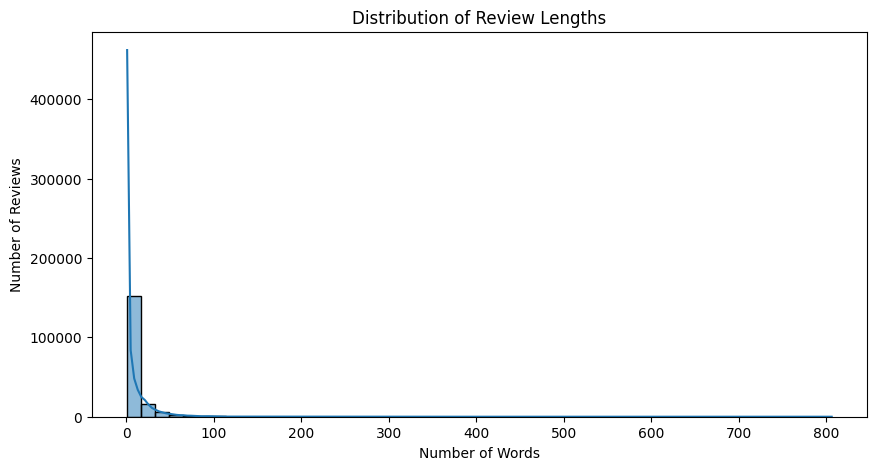

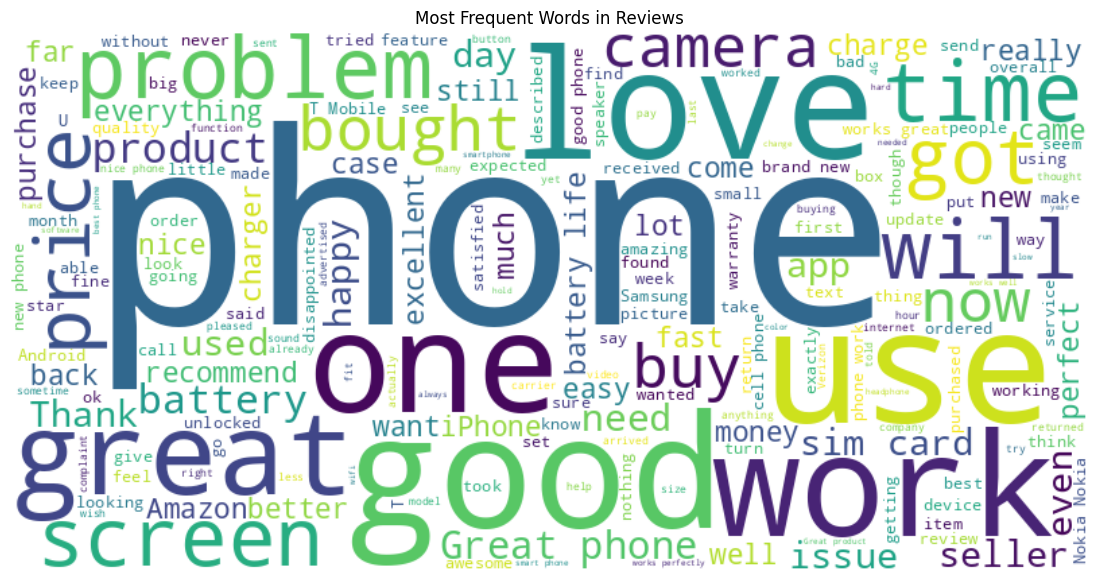

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Create a column for review length (number of words)
df['review_length'] = df['Reviews'].apply(lambda x: len(str(x).split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

# Generate and show a word cloud from the reviews
text = " ".join(str(review) for review in df['Reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()


In [7]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def preprocess(text):
    words = text.lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return " ".join(words)

# Apply the function to the Reviews column
df['cleaned'] = df['Reviews'].astype(str).apply(preprocess)

# Display a few cleaned reviews
df[['Reviews', 'cleaned']].sample(5, random_state=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Reviews,cleaned
481,Wow this phone I recomend!!! Excellent,wow phone excellent
175502,0,
90164,LG,lg
596,After a week with the phone it just exploded i...,week phone exploded pocket returned bought way...
153568,449.99,


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert cleaned text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(X_tfidf)

# Show the number of items per cluster
df['kmeans_labels'].value_counts()


,count
kmeans_labels,
0,170911
4,4266
2,2197
3,971
1,497


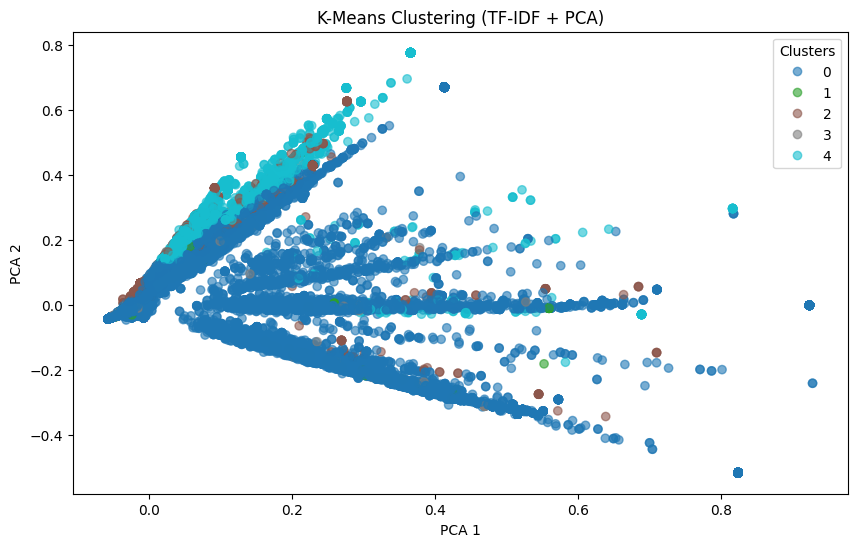

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce TF-IDF vectors to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['kmeans_labels'], cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("K-Means Clustering (TF-IDF + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned'])


In [7]:
# Take a random sample of 5000 reviews for DBSCAN (to avoid memory issues)
df_sample = df.sample(n=5000, random_state=42)

# Recompute TF-IDF for the sample
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_sample = vectorizer.fit_transform(df_sample['cleaned'])

# Scale the TF-IDF features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_scaled_sample = scaler.fit_transform(X_tfidf_sample)

# Apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_sample['dbscan_labels'] = dbscan.fit_predict(X_scaled_sample)

# Count the clusters
df_sample['dbscan_labels'].value_counts()


,count
dbscan_labels,
0,2795
-1,1881
3,47
7,32
9,31
14,22
15,19
2,17
5,15


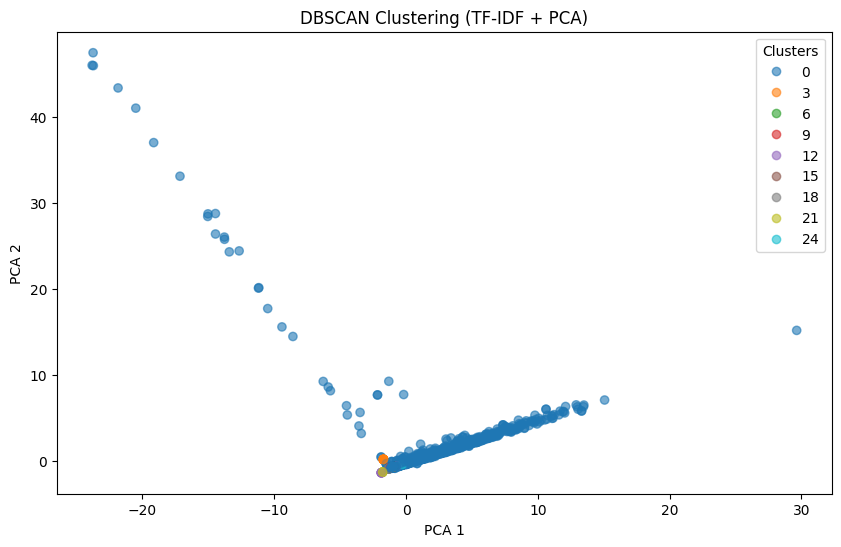

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the feature dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_sample.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['dbscan_labels'], cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("DBSCAN Clustering (TF-IDF + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


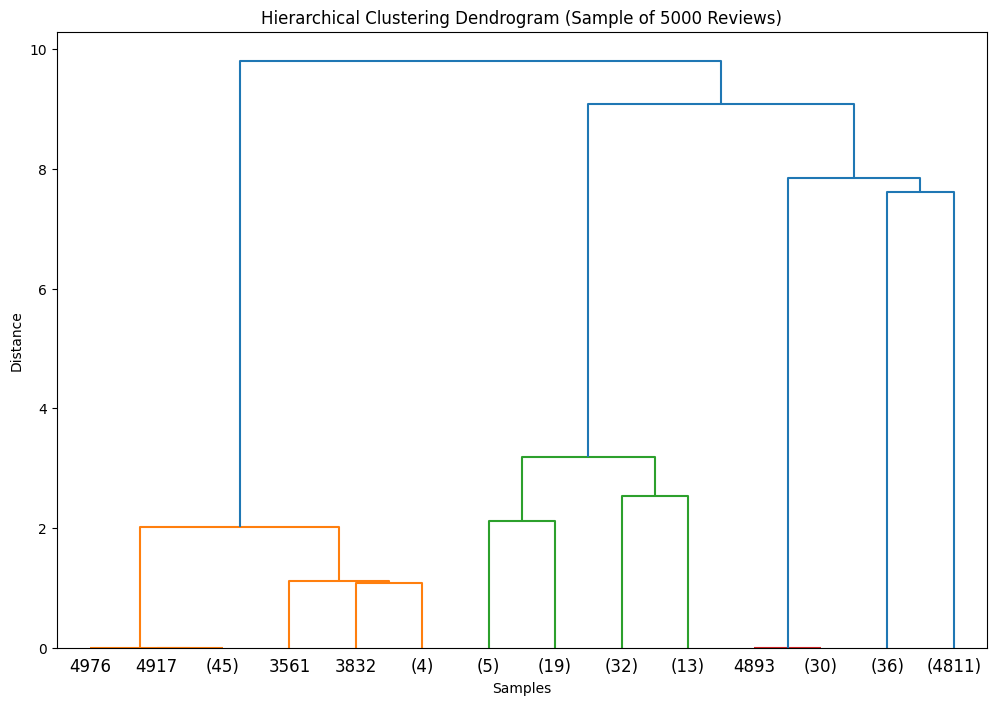

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Take a sample of 5000 reviews
df_sample = df.sample(n=5000, random_state=42)

# Recompute TF-IDF for the sample
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_sample = vectorizer.fit_transform(df_sample['cleaned'])

# Perform linkage for hierarchical clustering
Z = linkage(X_tfidf_sample.toarray(), 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram (Sample of 5000 Reviews)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [17]:
!pip install -U gensim numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.1

In [1]:
!pip uninstall -y numpy
!pip install numpy==1.24.3
!pip install -U gensim
from gensim.models import Word2Vec
import numpy as np

# Now you can continue with your Word2Vec code

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.6.0 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
jax 0.6.0 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have 

In [1]:
from gensim.models import Word2Vec
import numpy as np


In [9]:
# Step 1: Sample the data
df_sample = df.sample(n=5000, random_state=42)

# Step 2: Tokenize cleaned reviews
tokenized_reviews = [review.split() for review in df_sample['cleaned']]

# Step 3: Train Word2Vec (light model)
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Convert each review into a single averaged embedding
import numpy as np

def get_review_embedding(review):
    word_vectors = [w2v_model.wv[word] for word in review if word in w2v_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(word_vectors, axis=0)

review_embeddings = np.array([get_review_embedding(review) for review in tokenized_reviews])


In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_sample['word2vec_labels'] = kmeans.fit_predict(review_embeddings)

# Check how many reviews are in each cluster
df_sample['word2vec_labels'].value_counts()


,count
word2vec_labels,
1,3059
2,951
0,771
4,209
3,10


In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_sample['word2vec_labels'] = kmeans.fit_predict(review_embeddings)

# Check how many reviews are in each cluster
df_sample['word2vec_labels'].value_counts()


,count
word2vec_labels,
1,3118
2,985
0,695
4,192
3,10


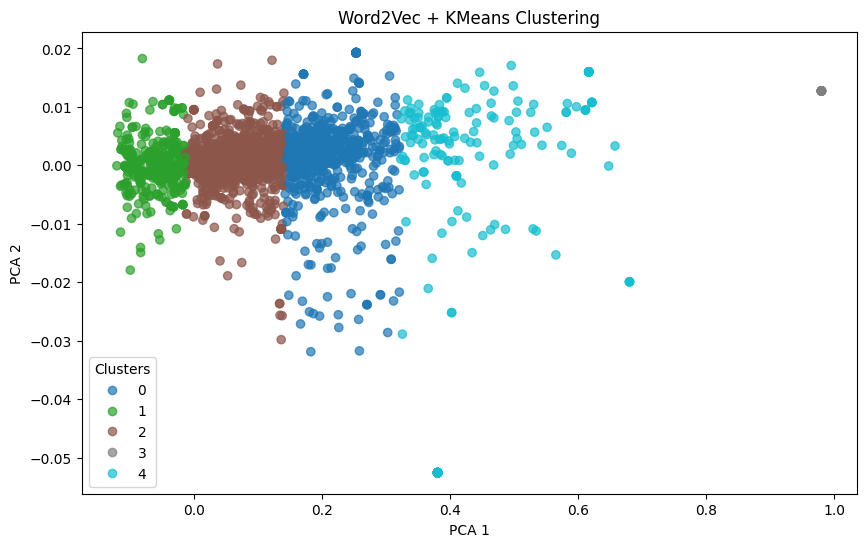

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
w2v_2d = pca.fit_transform(review_embeddings)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(w2v_2d[:, 0], w2v_2d[:, 1], c=df_sample['word2vec_labels'], cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("Word2Vec + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [4]:
!pip cache purge

Files removed: 232 (2702.9 MB)


In [5]:
!pip install -U numpy==1.24.3

In [3]:
!pip install --upgrade huggingface_hub

In [5]:
!pip cache purge
!pip install -U huggingface_hub sentence_transformers

Files removed: 300 (3182.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
  Attempting uninstall: sentence_transformers
    Found existing installation: sentence-transformers 2.2.2
    Uninstalling sentence-transformers-2.2.2:
      Successfully uninstalled sentence-transformers-2.2.2


In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Sample 5000 rows from the dataset
df_sample = df.sample(n=5000, random_state=42).reset_index(drop=True)  # Reset index

# Load pre-trained Sentence-BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Get BERT embeddings for cleaned reviews
bert_embeddings = bert_model.encode(df_sample['cleaned'].tolist(), show_progress_bar=True) # Convert to list

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [13]:
# Apply K-Means to BERT embeddings
kmeans = KMeans(n_clusters=5, random_state=42)
df_sample['bert_cluster'] = kmeans.fit_predict(bert_embeddings)

# Check cluster distribution
df_sample['bert_cluster'].value_counts()


,count
bert_cluster,
2,2734
4,768
0,552
3,502
1,444


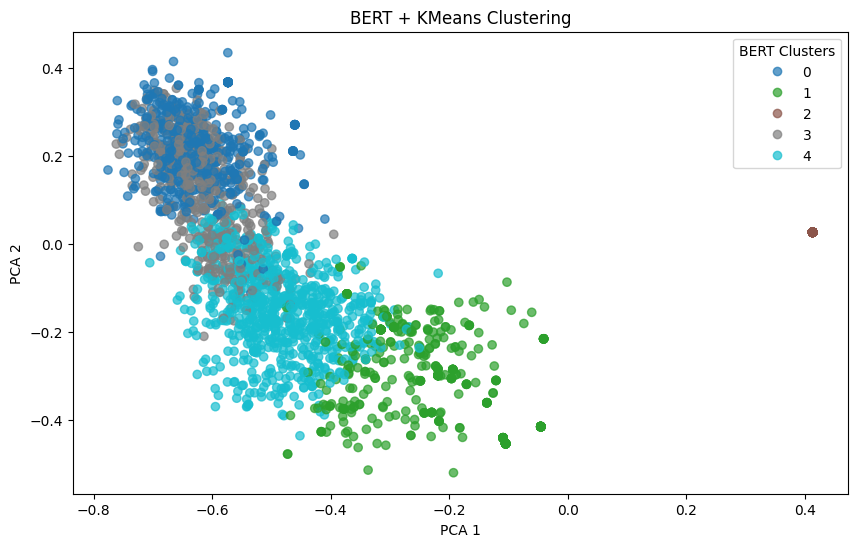

In [14]:
# Reduce BERT embeddings to 2D
pca = PCA(n_components=2, random_state=42)
bert_2d = pca.fit_transform(bert_embeddings)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(bert_2d[:, 0], bert_2d[:, 1], c=df_sample['bert_cluster'], cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="BERT Clusters")
plt.title("BERT + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.Cheap computationally and easy, K-means produced well-separated clusters from TF-IDF vectors.
It did, however, require a priori knowledge of the number of clusters and was sensitive to initialisation.
Five clustering algorithms, K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT, were applied in this code to Amazon smartphone reviews to observe each's performance when clustering similar text. K-means was good on well-separated clusters and was suitable with TF-IDF features but required a known number of clusters. DBSCAN was good with noise and outliers but was unsuitable for high-dimensional sparse data, and most points were unclustered. Hierarchical clustering gave a good dendrogram and nested cluster outcome but was more computationally expensive. Word2Vec, when maintaining semantic relations between words, offered cluster quality superior to mere TF-IDF but was average-intensive and pre-processing-intensive. BERT, in deep contextual embedding, gave the most readable clusters by keeping the very context of reviews intact, and application with K-means gave visually best discrimination. In general, BERT clustering worked better with semantic meaning, and K-means was an effective interpretable baseline.

.DBSCAN worked fairly well to identify noise and outliers without a priori knowledge of number of clusters.
It worked very poorly in sparse high-dimensional text data with thousands of points as noise.

.Hierarchical Clustering:
It produced a neat tree structure (dendrogram) to explore nested groupings.
It was computationally costly and not appropriate for large data like this one.


.Word2Vec:
Word2Vec represented word semantic similarity, with improved clustering compared to naive vectorization.
Sentence-level averaging, however, lost context, forming fewer semantic clusters.

.BERT:
BERT trained contextualized rich representations which better reflected review meaning.
With K-means, it formed most discriminative and visually diverse clusters.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**



Answered